In [167]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.color import label2rgb, rgb2gray
import numpy as np
import cv2


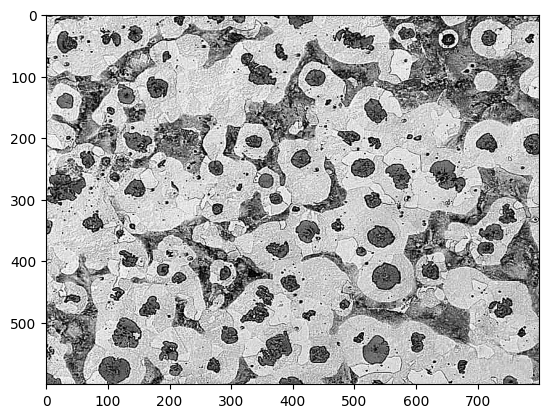

In [190]:
img = cv2.imread("/content/image3.jpg", 0)

sharpening_filter = np.array([[-1,-1,-1],
                             [-1, 9 , -1],
                             [-1,-1,-1]])

#kernel_size = np.ones((5, 5), float) / 25

image = cv2.filter2D(img, -1, sharpening_filter)

#image = cv2.filter2D(img, -1, kernel_size)

#image = cv2.equalizeHist(image)
plt.imshow(image, cmap='gray')
scale = 0.6 #microns/pixel

In [191]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(image)
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [192]:
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow
%matplotlib inline

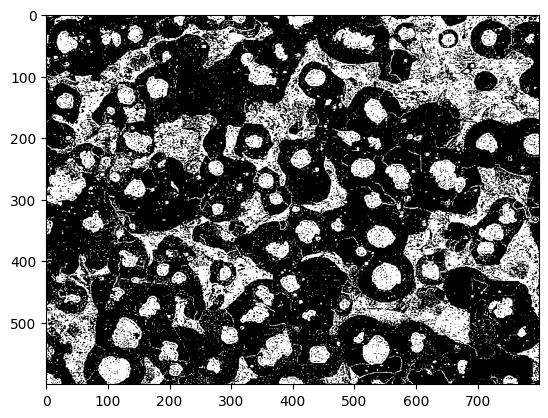

In [193]:
#thresholded_img = image < 200

thresholded_img = image < threshold
plt.imshow(thresholded_img, cmap='gray')


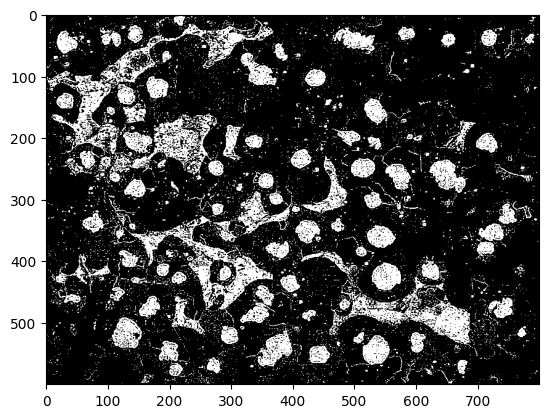

In [194]:
from skimage.segmentation import clear_border
edge_touching_removed = clear_border(thresholded_img)
plt.imshow(edge_touching_removed, cmap='gray')

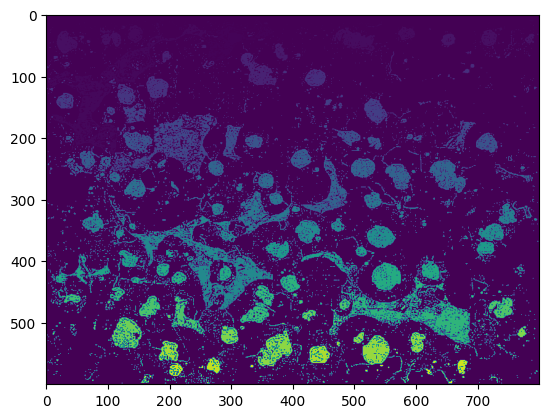

In [195]:
label_image = measure.label(edge_touching_removed, connectivity=image.ndim)

plt.imshow(label_image)

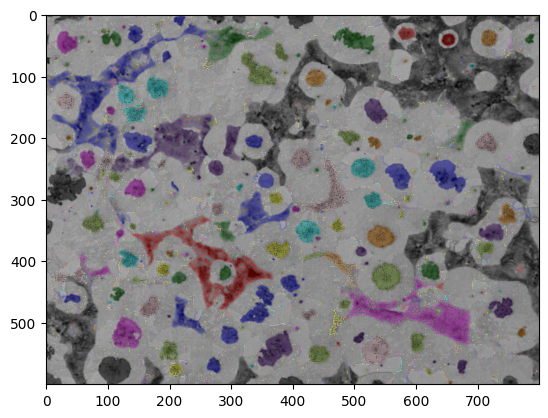

In [196]:
image_label_overlay = label2rgb(label_image, image=img)
plt.imshow(image_label_overlay)

In [197]:
all_props=measure.regionprops(label_image, image)

In [198]:
for prop in all_props:
    print('Label: {} Area: {}'.format(prop.label, prop.area))

Streaming output truncated to the last 5000 lines.
Label: 476 Area: 1
Label: 477 Area: 4
Label: 478 Area: 1
Label: 479 Area: 4
Label: 480 Area: 2
Label: 481 Area: 6
Label: 482 Area: 2
Label: 483 Area: 5
Label: 484 Area: 1
Label: 485 Area: 3
Label: 486 Area: 3
Label: 487 Area: 1
Label: 488 Area: 1
Label: 489 Area: 1
Label: 490 Area: 1
Label: 491 Area: 2
Label: 492 Area: 2
Label: 493 Area: 2
Label: 494 Area: 6
Label: 495 Area: 1
Label: 496 Area: 1
Label: 497 Area: 1
Label: 498 Area: 2
Label: 499 Area: 1
Label: 500 Area: 11
Label: 501 Area: 1
Label: 502 Area: 171
Label: 503 Area: 1
Label: 504 Area: 1
Label: 505 Area: 2
Label: 506 Area: 19
Label: 507 Area: 1
Label: 508 Area: 1
Label: 509 Area: 1
Label: 510 Area: 1
Label: 511 Area: 1
Label: 512 Area: 1
Label: 513 Area: 1
Label: 514 Area: 1
Label: 515 Area: 59
Label: 516 Area: 6
Label: 517 Area: 1
Label: 518 Area: 1
Label: 519 Area: 2
Label: 520 Area: 1
Label: 521 Area: 1
Label: 522 Area: 2
Label: 523 Area: 21
Label: 524 Area: 1
Label: 525 A

In [199]:
props = measure.regionprops_table(label_image, image,
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity'])

In [200]:
import pandas as pd
df = pd.DataFrame(props)
print(df.head())

   label  area  equivalent_diameter  mean_intensity  solidity
0      1     1             1.128379      123.000000  1.000000
1      2   204            16.116478       41.691176  0.816000
2      3     8             3.191538      100.125000  0.888889
3      4     2             1.595769      128.500000  1.000000
4      5     1             1.128379      132.000000  1.000000


In [201]:
df = df[df['area'] > 50]
print(df.head())

     label  area  equivalent_diameter  mean_intensity  solidity
1        2   204            16.116478       41.691176  0.816000
54      55  1996            50.412163       74.792084  0.451379
121    122  6781            92.918445       70.967409  0.233602
141    142   456            24.095585       53.335526  0.798599
170    171   384            22.111626       53.786458  0.728653


In [202]:
df['area_sq_microns'] = df['area'] * (scale**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (scale)
print(df.head())

     label  area  equivalent_diameter  mean_intensity  solidity  \
1        2   204            16.116478       41.691176  0.816000   
54      55  1996            50.412163       74.792084  0.451379   
121    122  6781            92.918445       70.967409  0.233602   
141    142   456            24.095585       53.335526  0.798599   
170    171   384            22.111626       53.786458  0.728653   

     area_sq_microns  equivalent_diameter_microns  
1              73.44                     9.669887  
54            718.56                    30.247298  
121          2441.16                    55.751067  
141           164.16                    14.457351  
170           138.24                    13.266975  
